# Tarea 3 

Integrantes 
> * César Bustos 
> * Santiago Romero

## 1. Números aleatorios en Python.
> a. Genere en Python una secuencia de 10000 números aleatorios a través del método de congruencia lineal usando los siguientes parámetros:
> * Semilla (x0)=2020
> * Módulo (m)=2ˆ31+3
> * Constante multiplicativa (a)=2ˆ16+1
> * Incremento (c)=0

In [1]:
# Función del método de congruencia
def num_ale(x0, m, a, c):
    return (a*x0 + c)%m 

# Lista vacia inicial 


n=1000
x0 = 2020
m = 2**31 +3
a = 2**16 +1
c = 0 

#Creamos la función que itere el número n de números a crear 

def get_num_ale(n, x0, m, a, c):
    ale_nums = list()
    for i in range(n):
        x0 = num_ale(x0, m, a, c)
        reales = x0/m
        ale_nums.append(reales)
    return ale_nums


ale_nums = get_num_ale(n, x0, m, a, c)


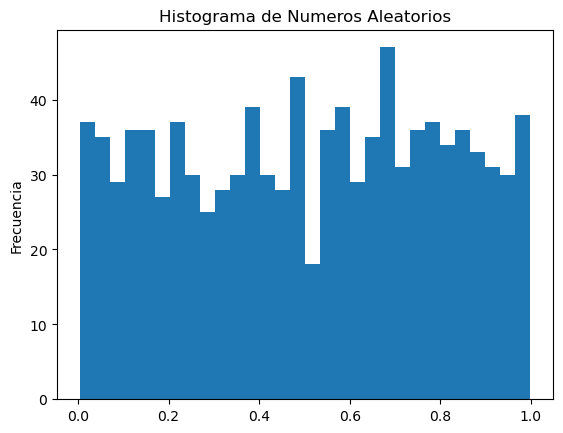

In [2]:
import matplotlib.pyplot as plt

#Creamos el histograma de números aleatorios creados 
plt.hist(ale_nums, bins=30)
plt.title('Histograma de Numeros Aleatorios')
plt.ylabel('Frecuencia')
plt.show()

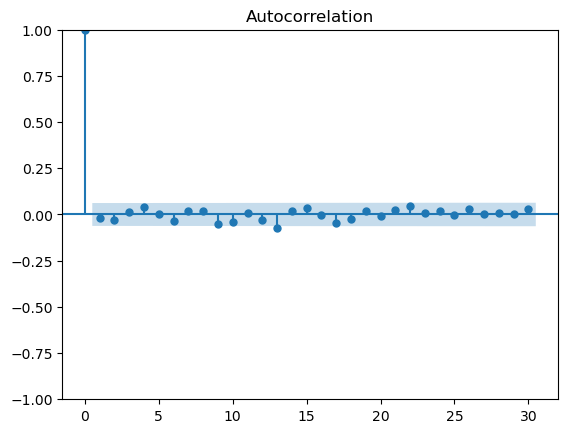

In [3]:
#Creamos el autocorrelograma 
import numpy as np
import statsmodels.api as sm
nums = np.array(ale_nums)
sm.graphics.tsa.plot_acf(nums)
plt.show()


## 2. Variables aleatorias en Python.
Genere 10000 variables aleatoria de acuerdo con una distribución exponencial con parámetro λ = 20.

## Transformación inversa

Vamos a usar una ditribución exponencial.

Entonces de la funcion de probabilidad vamos a sacar la variable aleatoria $X_i$


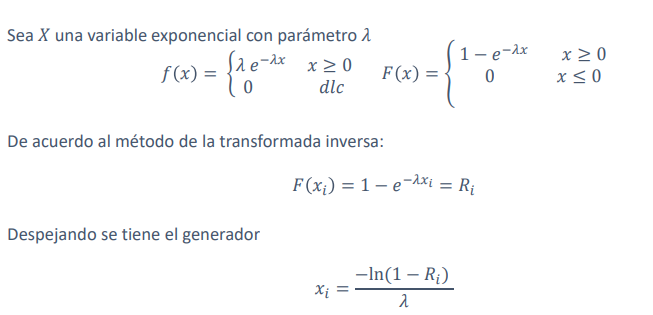

In [4]:
## Generador de xi para la funcnión de propabilidad de la distribución exponencial
def get_xi(R, lambda_):
    xi = -np.log(1-R)/lambda_
    return xi

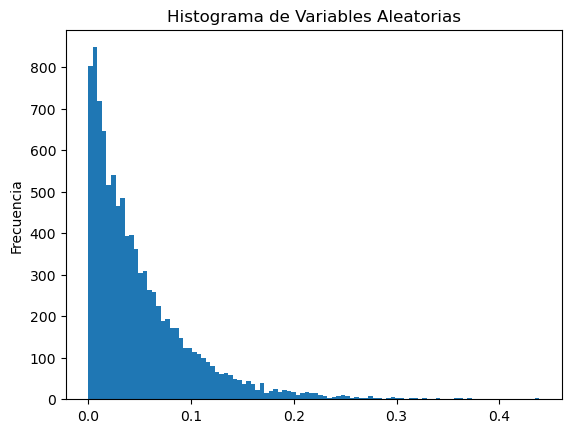

In [5]:
#Generamos el numero de valores aleatorios con los mismos parametros del punto 1

n = 10000
x0 = 2020
m = 2**31 +3
a = 2**16 +1
c = 0 

ale_nums = get_num_ale(n, x0, m, a, c)

#Numpy array vacio inicial 
vars_ale = np.array([])

#Iteramos el generador en cada uno de los numeros aleatorios creados 
for i in ale_nums:
    Ri = get_xi(i,lambda_=20) 
    vars_ale = np.append(vars_ale, Ri)

plt.hist(vars_ale, bins=100)
plt.title('Histograma de Variables Aleatorias')
plt.ylabel('Frecuencia')
plt.show()


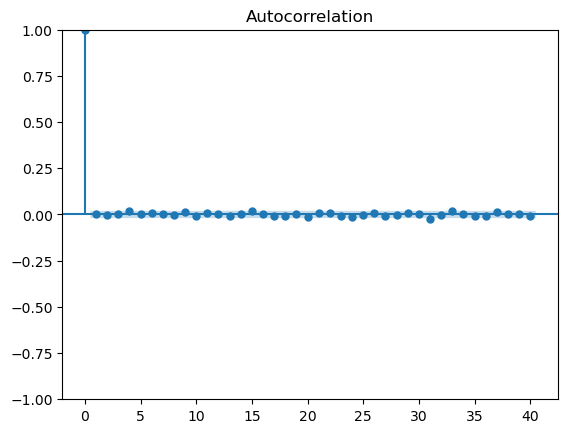

In [6]:
#Creamos el autocorrelograma 
sm.graphics.tsa.plot_acf(vars_ale)
plt.show()

## 3. Simulacíon salas de cine

Se modifico el codigo de la simulación de las salas de cine para poder jugar con los parametros de cashier, user y num_servers, además de una pequeña modificación para poder realizar los subplots y retornar los valores de mins y secs de cada corrida del modelo. Esto con el fin de iterar sobre valores de estos parámetros y poder tener la información estructurada de qué tiempos de espera corresponden a las combinaciones realizadas. 

In [7]:
import caso_cine_simpy

Running simulation... 
The average wait time is 24 minutes and 13 seconds.


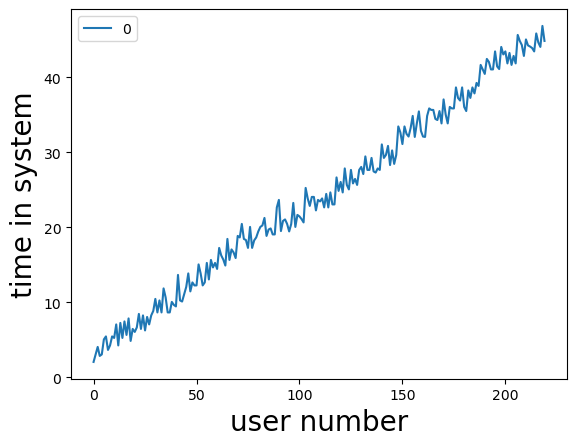

In [8]:
num_cashiers = 5
num_servers = 5 
num_ushers = 2


mins, secs = caso_cine_simpy.main(num_cashiers, num_servers, num_ushers, ax=None)
plt.show()

In [9]:
import pandas as pd
def plot_combinations():
    system_times = []
    cashier_range = [5, 8, 12, 15]
    server_range = [5, 8, 12, 15]
    usher_range = [1, 2, 3, 4]

    combinations = [(c, s, u) for c in cashier_range for s in server_range for u in usher_range]
    results = []
    
    cols = 4
    
    import math

    rows = math.ceil(len(combinations)/cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows*5))


    for i, (c, s, u) in enumerate(combinations):
        system_times = []
        ax = axes[i // len(server_range)][i % len(server_range)]
        mins, secs = caso_cine_simpy.main(c, s, u, ax=ax)
        results.append([c, s, u, mins, secs])
        ax.set_title(f"Cashiers: {c}, Servers: {s}, Ushers: {u} \n Tiempo Promedio: {mins}:{secs} min")
        ax.set_xlabel('User Number')
        ax.set_ylabel('Time in System')
    
    plt.tight_layout()
    plt.show()

    df_results = pd.DataFrame(results, columns=['Cashiers', 'Servers', 'Ushers', 'Mins', 'Secs'])
    return df_results


Running simulation... 
The average wait time is 24 minutes and 14 seconds.
Running simulation... 
The average wait time is 24 minutes and 13 seconds.
Running simulation... 
The average wait time is 24 minutes and 12 seconds.
Running simulation... 
The average wait time is 24 minutes and 12 seconds.
Running simulation... 
The average wait time is 23 minutes and 47 seconds.
Running simulation... 
The average wait time is 23 minutes and 46 seconds.
Running simulation... 
The average wait time is 23 minutes and 46 seconds.
Running simulation... 
The average wait time is 23 minutes and 46 seconds.
Running simulation... 
The average wait time is 23 minutes and 47 seconds.
Running simulation... 
The average wait time is 23 minutes and 46 seconds.
Running simulation... 
The average wait time is 23 minutes and 46 seconds.
Running simulation... 
The average wait time is 23 minutes and 46 seconds.
Running simulation... 
The average wait time is 23 minutes and 47 seconds.
Running simulation... 
Th

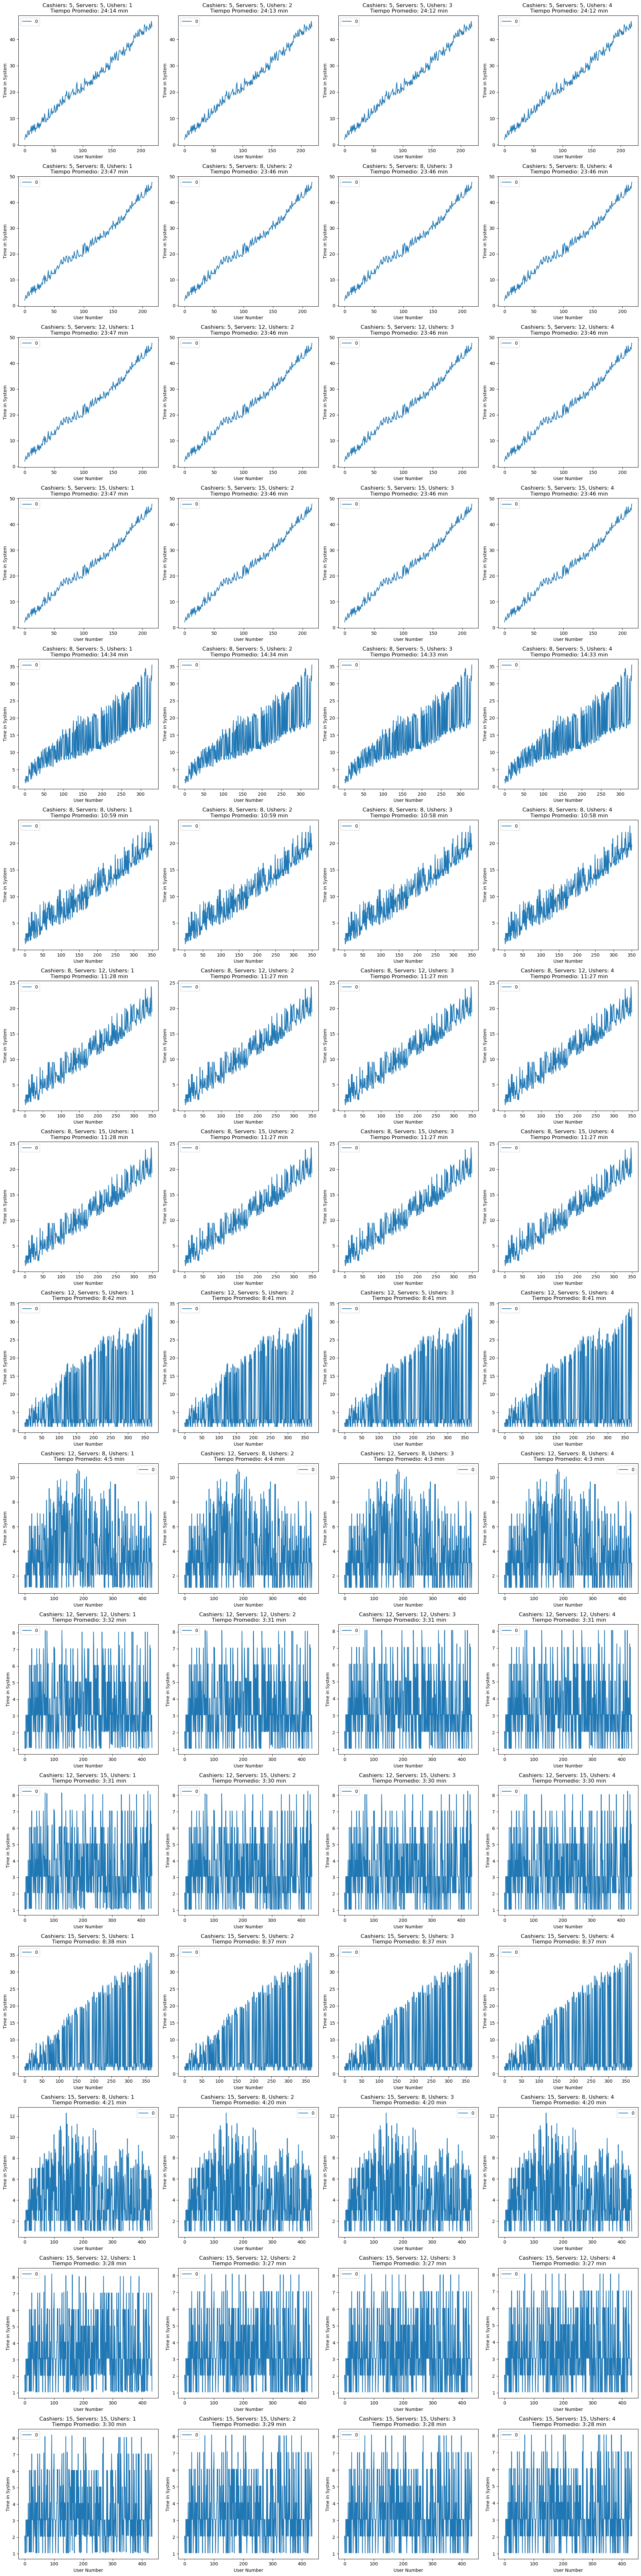

Cashiers  Servers  Ushers  Mins  Secs
0          5        5       1    24    14
1          5        5       2    24    13
2          5        5       3    24    12
3          5        5       4    24    12
4          5        8       1    23    47
..       ...      ...     ...   ...   ...
59        15       12       4     3    27
60        15       15       1     3    30
61        15       15       2     3    29
62        15       15       3     3    28
63        15       15       4     3    28

[64 rows x 5 columns]

In [10]:
df_results = plot_combinations()
df_results

#### Conclusiones

* Basado en los resultados generados por la combinación de diferentes grupos atendiendo las estaciones del cine, se puede evaluar a partir de un modelo de optimización en que se conozcan cuales son los costos por contratación y turno para cada empleado en el cine y que capacidades máximas dispone el lugar para asignar cada rol.

* El rol que genera cambios significativos en los tiempos de atención de un cliente en el sistema son los Cashiers, a medida que este rol tiene una mayor capacidad, es decir que hay mas cashier disponibles, menor es el tiempo promedio de los usuarios. Los demas roles solo tienen un impacto prinicipalmente en diferencias de segundos. 

* Apesar de que los tiempos de atención de un Cashier son menores que los tiempos de atención de un Server, el impacto sobre el primer rol se da principalmente porque el 100% de los usuarios/clientes deben pasar obligatoriamente por este punto. Luego, aleatoriamente la simulación divide a los usuarios que pasan directamente con los Ushers o quienes primero van con los Server. Esto permite interpetar el impacto significativo en minutos únicamente con el primer rol. 

## 4. Simulacíon salas de cine - Simio

Para simular la sala de cine en simio se consideraron los siguientes elementos:
1. **Model Entity** - Define que elemento ingresa al sistema.
2. **Source / Entrada** 
3. **Server** - Puntos por el que los elementos deben pasar, en este caso son 3 estaciones (Venta Boletos, Venta Alimentos(No todos los usuarios pasan por este server), Entrega Boletos)
4. **Paths** - Determinar cuales son las rutas que deben tomar los elementos para ir al siguiente server
5. **Sink** - Elimina los elementos del sistema

#### Diseño del sistema

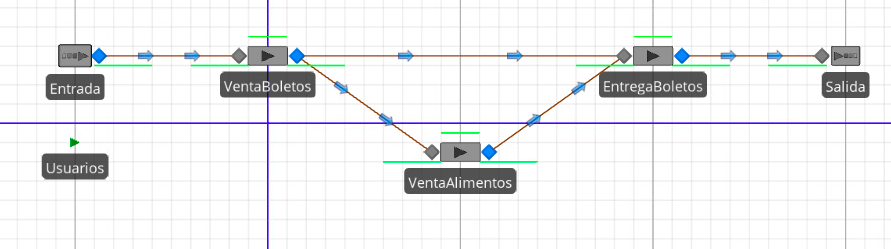

La parametrización de los elementos del sistema se realizaron de la siguiente forma con tal de asemejarse al modelo presentado en Python.

1. **Entrada** - Random.Exponential(23) ~ Seconds | Capacity = Inf
2. **VentaBoletos** - Random.Uniform(1,3) ~ Minutes | Capacity = 5 
3. **VentaAlimentos** - Random.Uniform(1,5) ~ Minutes | Capacity = 5 
4. **EntregaBoletos** - Random.Uniform(1,5) ~ Seconds | Capacity = 2 

Para los dos Paths que salen del Server **VentaBoletos** se asigno el valor de **Selection Weight** = 1.0, lo que significa que los elementos tienen una probabilidad del 50% de tomar cualquier camino

#### Resultados de la simulación

Luego de correr la simulación por un periodo de 18 horas (Tiempo esperado de operación de una sala de cine), se obtuvieron los siguientes resultados:

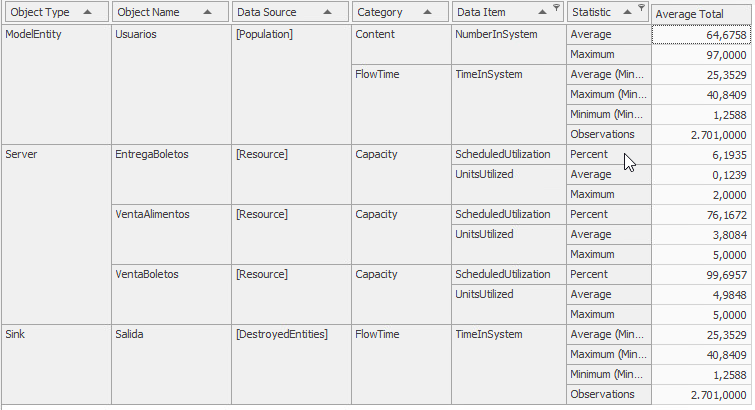

Se puede destacar de la simulación:
1. El promedio de usuarios en espera en el sistema es en promedio 64
2. El tiempo en sistema promedio son 25 minutos
3. VentaAlimentos y VentaBoletos tienen una opcuación del 76% y 99% por lo que genera tantos clientes en sistema

### Modificación de la simulación

Para generar nuevos resultados en la simulación, unicamente se modificarán valores asociados con la capacidad disponible en cada server por lo que se realizarán las diferentes combinaciones:

#### Simulación 1

1. **Entrada** - Random.Exponential(23) ~ Seconds | Capacity = Inf
2. **VentaBoletos** - Random.Uniform(1,3) ~ Minutes | Capacity = 8 
3. **VentaAlimentos** - Random.Uniform(1,5) ~ Minutes | Capacity = 8 
4. **EntregaBoletos** - Random.Uniform(1,5) ~ Seconds | Capacity = 2 

Luego de correr la simulación por un periodo de 18 horas (Tiempo esperado de operación de una sala de cine), se obtuvieron los siguientes resultados:

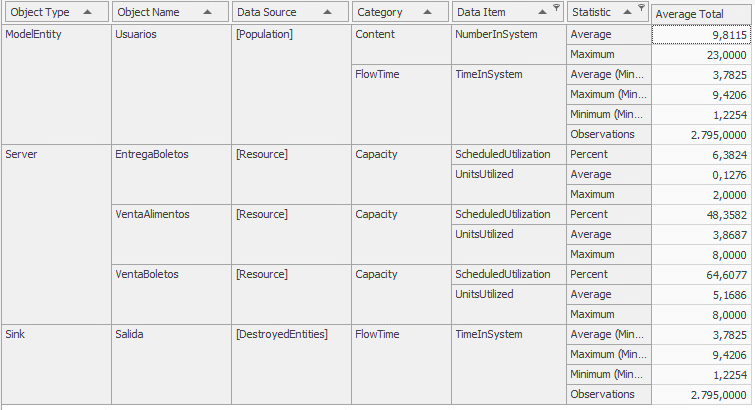

Se puede observar como mejora considerablemente el sistema: 
1. El promedio de usuarios en espera en el sistema es en promedio 9, que antes era de 64.
2. El tiempo en sistema promedio son 3 minutos, que antes eran 25.
3. VentaAlimentos y VentaBoletos tienen una opcuación del 48% y 64%, una menor utilización de los dos servers

#### Simulación 2

1. **Entrada** - Random.Exponential(23) ~ Seconds | Capacity = Inf
2. **VentaBoletos** - Random.Uniform(1,3) ~ Minutes | Capacity = 12 
3. **VentaAlimentos** - Random.Uniform(1,5) ~ Minutes | Capacity = 12 
4. **EntregaBoletos** - Random.Uniform(1,5) ~ Seconds | Capacity = 3

Luego de correr la simulación por un periodo de 18 horas (Tiempo esperado de operación de una sala de cine), se obtuvieron los siguientes resultados:

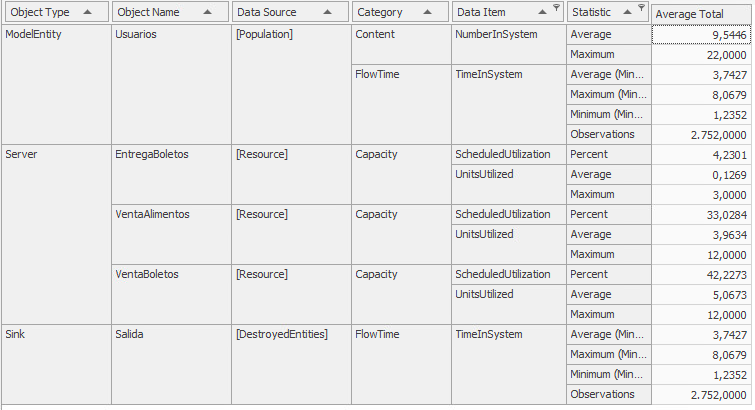

En este punto se pueden identificar dos comportamientos:
1. El número de elementos y el tiempo en el sistema se mantiene constante.
2. El porcentaje de utilización sigue disminuyento.

Es importante identificar las prioridades del negocio en este punto, ya que con estos resultados se podria decir que:
1. Si la prioridad del negocio es el costo de operación, entonces el escenario en la simulación 1 debería ser suficiente
2. Si la prioridad del negocio es el tiempo de atención de clientes entonces es necesario definir un punto de equilibrio entre el % de utilización y el tiempo promedio en el sistema para cada usuario

#### Simulación 3

1. **Entrada** - Random.Exponential(23) ~ Seconds | Capacity = Inf
2. **VentaBoletos** - Random.Uniform(1,3) ~ Minutes | Capacity = 15
3. **VentaAlimentos** - Random.Uniform(1,5) ~ Minutes | Capacity = 15 
4. **EntregaBoletos** - Random.Uniform(1,5) ~ Seconds | Capacity = 4 

Luego de correr la simulación por un periodo de 18 horas (Tiempo esperado de operación de una sala de cine), se obtuvieron los siguientes resultados:

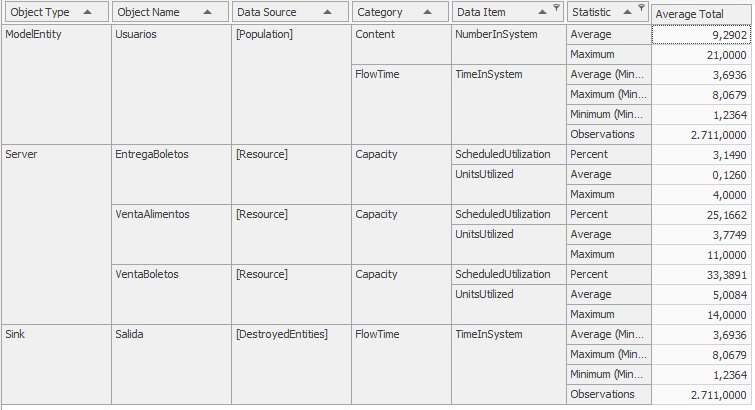

Al igual que en el caso anterior, los elementos y el tiempi en el sistema son constantes. El porcentaje de utilización sigue disminuyendo. Se puede concluir igual que en el punto anterior.